Considere a equation $x = 1 − e^{−cx}$, em que c é um parãmetro conhecido and x uma incógnita. Esta equação surge numa variedade de situações, incluindo a física dos processos de contacto, os modelos matemáticos de epidemias e a teoria de gráficos aleatórios.

1. Escreva um programa para resolver esta equação para x usando o método de relaxação para o caso  c = 2. Calcule asua solução com uma exactidão de pelo menos 10−6.

2. Modifique seu programa para calcular a solução para valores de c de 0 a 3 em passos de 0.01 e faça um gráfico de x em função de c. Deve ver uma transição clara de um regime em que x = 0 para um regime de $ x \neq 0 $. Este é outro exemplo de transição de fase. Na física, essa transição é conhecida como transição de percolação; em epidemiologia é o limiar epidémico.


In [6]:
import numpy as np
import pylab as p
from matplotlib import animation           
from IPython.display import display, Image
from IPython.display import HTML

def init():
    line.set_data([], [])                     
    return line,

def animate(i):
    line.set_data(x, MA[i])
    return line,

N = 100
def f(x,c,M):
    a = np.ones(M)
    return a-np.exp(-c*x)

def df(x,c):
    return c*np.exp(-c*x)

def relax1(x,error,c,M):
    e = 1
    while np.abs(e)> np.abs(error):
        a,x = x,f(x,c,M)
        e = (a-x)/(1-1/df(a,c))
    return x

def relax(x,c,M):
    for i in range(N):
        x = f(x,c,M)
    return x

In [23]:
print(relax1(1,10**(-6),2,1),'\n')
print(relax(1,2,1),'\n')
print(np.abs(relax(1,2,1)-relax1(1,10**(-6),2,1)),'\n')


[ 0.79681263] 

[ 0.79681213] 

[  5.01091826e-07] 



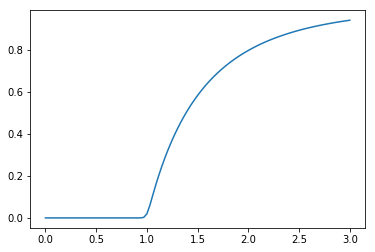

In [24]:
c = np.linspace(0,3,100)
x = np.ones(len(c))
y = relax(x,c,len(c))
p.plot(c,y)
p.show()

In [40]:
def f(x,c):
    return 1-np.exp(-c*x)

def relax(x,c):
    for i in range(N):
        x = f(x,c)
    return x

def relax2(x,error,c):
    e = 1
    b = 0
    while np.abs(e)> np.abs(error):
        a,x = x,f(x,c)
        e = (a-x)/(1-1/df(a,c))
        b += 1
    return [x,b]

def overrelax(x,error,c,w):
    e = 1
    b = 0
    while np.abs(e)> np.abs(error):
        a,x = x,((1+w)*f(x,c)-w*x)
        e = (a-x)/(1-1/((1+w)*df(a,c)-w))
        b += 1
    return [x,b]
                   
print(relax(1,2))
print(relax2(1,10**(-6),2))
print(overrelax(1,10**(-6),2,0.4))

0.79681213002
[0.79681263111184575, 14]
[0.79681243148634029, 7]


In [43]:
def f(x):
    return 0.4*(1+x**2)

def relax(x):
    for i in range(N):
        x = f(x)
    return x
print(relax(1))

def f(x):
    return np.sqrt((x-0.4)/0.4)
print(relax(1))

0.5
2.0


In [2]:
def f(x):
    return 5*np.exp(-x) + x - 5
def bi(x1,x2,error):
    e = 1
    while np.abs(e)>error:
        x = x1 + 0.5*np.abs(x1-x2)
        if f(x)*f(x1)<0:
            x2 = x
        else:
            x1 = x
        e = np.abs(x1-x2)
    x = x1 + 0.5*np.abs(x1-x2)
    return x
print((6.626e-34)*3e8/((1.38065e-23)*bi(1,5,10**(-10))))

0.00289974524084


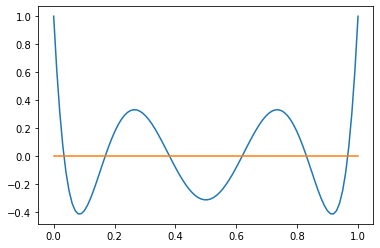

In [6]:
import numpy as np
import pylab as p

def P(x):
    return 924*x**6-2772*x**5+3150*x**4-1680*x**3+420*x**2-42*x+1
def dP(x):
    return 924*6*x**5-2772*5*x**4+3150*4*x**3-1680*3*x**2+420*2*x-42
x = np.linspace(0,1,100)
y = P(x)
p.plot(x,y)
y = np.zeros(len(x))
p.plot(x,y)
p.show()

In [7]:
def newton(x,error):
    e = 1
    while np.abs(e)>np.abs(error):
        a,x = x,x-P(x)/dP(x)
        e = np.abs(x-a)
    return a
for i in range(3):
    print(newton((i)*0.4 + 0.15,10**(-6)))
    print(newton((i)*0.4 + 0.01,10**(-6))) 

0.1693952067020435
0.03376524282433868
0.6193095930422011
0.38069040695723316
0.9662347571664821
0.8306046933673886


In [2]:
def newton(x,error):
    e = 1
    while np.abs(e)>np.abs(error):
        a,x = x,x-f(x)/df(x)
        e = np.abs(x-a)
    return a

def sec(x1,x2,error):
    e = 1
    while np.abs(e)>np.abs(error):
        x1,x3 = x2,x2-f(x2)*(x2-x1)/(f(x2)-f(x1))
        x2 = x3
        e = np.abs(x2-x1)
    return x2

def f(r):
    G = 6.674e-11
    M = 5.974e24
    m = 7.348e22
    w = 2.662e-6
    R = 3.844e8
    return G*M/r**2-G*m/(R-r)**2-w**2*r

def df(r):
    G = 6.674e-11
    M = 5.974e24
    m = 7.348e22
    w = 2.662e-6
    R = 3.844e8
    return 2*m/(R-r)**3 - 2*M/r**3 - w**2



print(sec(1e8,1.5e8,1e-4))


326045071.66535544


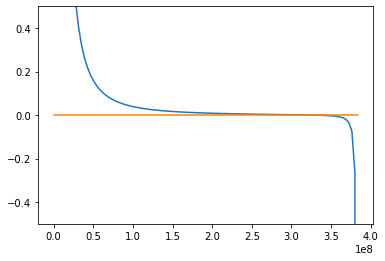

In [3]:
G = 6.674e-11
M = 5.974e24
m = 7.348e22
w = 2.662e-6
R = 3.844e8
x = np.linspace(1,3.84e8,100)
y = f(x)
p.plot(x,y)
p.plot(x,np.zeros(len(x)))
p.ylim(-0.5,0.5)
p.show()

In [3]:
def newton(x,error):
    e = 1
    while np.abs(e)>np.abs(error):
        a,x = x,x-f(x)/df(x)
        e = np.abs(x-a)
    return a
R = 3.844e8
def f(r):
    G = 6.674e-11
    M = 5.974e24
    m = 7.348e22
    w = 2.662e-6
    R = 3.844e8
    return G*M/r**2-G*m/(R-r)**2-w**2*r

def df(r):
    G = 6.674e-11
    M = 5.974e24
    m = 7.348e22
    w = 2.662e-6
    R = 3.844e8
    return -2*m*G/(R-r)**3 - 2*M*G/r**3 - w**2
newton(0.75*R,1e-4)

326045071.66535544

In [5]:
vt = 0.05
I0 = 3e-9
R1 = 1e3
R2 = 4e3
R3 = 3e3
R4 = 2e3
vm = 5
def Jac(v1,v2):
    J = np.zeros((2,2),float)
    J[0][0] = 1/R1 + 1/R2 + I0*np.exp((v1-v2)/vt)/vt
    J[0][1] = -I0*np.exp((v1-v2)/vt)/vt
    J[1][0] = -I0*np.exp((v1-v2)/vt)/vt
    J[1][1] = 1/R3 + 1/R4 + I0*np.exp((v1-v2)/vt)/vt
    return J

def f(v):
    v1 = v[0]
    v2 = v[1]
    c1= -((v1-vm)/R1+v1/R2)/I0 + 1
    c2 =((v2-vm)/R3+v2/R4)/I0 + 1 
    f1 = vt*np.log(c1)+v2
    f2 = -vt*np.log(c2)+v1
    return np.array([f1,f2],float)

def newton_vec(v,error):
    e = 1
    while np.abs(e)>np.abs(error):
        a = np.copy(v)
        J = Jac(v[0],v[1])
        Jinv = np.linalg.inv(J)
        x = np.dot(Jinv,f(v))
        v = np.copy(a-x)
        e = np.sum(np.abs(v-a))/2
    return a
v = np.array([1,1],float)
s = newton_vec(v,1e-8)
print(s)
print(s[1]-s[0])

[ 1.  1.]
0.0


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log


### relaxação

In [2]:
vt = 0.05
I0 = 3e-9
R1 = 1e3
R2 = 4e3
R3 = 3e3
R4 = 2e3
vm = 5
def f(v):
    v1 = v[0]
    v2 = v[1]
    f1 = R1*(vm/R1 -v1/R2 + I0*(np.exp(-(v1-v2)/vt)-1) )
    f2 = R3*(vm/R3 -v2/R4 + I0*(np.exp(-(v1-v2)/vt)-1) )
    return np.array([f1,f2],float)

v = np.array([1,1],float)

def relax_vec(v,error):
    e = 1
    while np.abs(e)>np.abs(error):
        a = np.copy(v)
        v = np.copy(f(v))
        e = np.sum(np.abs(v-a))/2
        print(v)
        print(e)
        
    return v
relax_vec(v,1e-6)

[ 4.75  3.5 ]
3.125
[ 3.812497 -0.250009]
2.343756
[ 4.04687275  5.3750045 ]
2.929694625
[ 1030691.60931528  3092059.80059365]
2061370.99402
[ inf  inf]
inf
[ nan  nan]
nan


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


array([ nan,  nan])